# Transfer Learning with Pre-trained Models on CIFAR-100

## Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the CIFAR-100 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by CIFAR-100, which consists of 100 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

## Project Flow

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

: 

## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### 2.2 Using VGG16

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### 2.3 Using MobileNetV2

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/var/folders/rm/y5pxyvy54flgpdx7tjppfrn00000gn/T/ipykernel_63442/3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [5]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50    = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16       = model_vgg16.fit   (X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 375s 237ms/step - accuracy: 0.3383 - loss: 2.6756 - val_accuracy: 0.3911 - val_loss: 2.4632
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 405s 259ms/step - accuracy: 0.4602 - loss: 2.0391 - val_accuracy: 0.4269 - val_loss: 2.2665
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 464s 297ms/step - accuracy: 0.5419 - loss: 1.6676 - val_accuracy: 0.4423 - val_loss: 2.3427
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 298s 190ms/step - accuracy: 0.2060 - loss: 3.8398 - val_accuracy: 0.2934 - val_loss: 2.8203
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 285s 182ms/step - accuracy: 0.3143 - loss: 2.6590 - val_accuracy: 0.3228 - val_loss: 2.6048
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 163ms/step - accuracy: 0.3478 - loss: 2.4957 - val_accuracy: 0.3396 - val_loss: 2.5945
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.1815 - loss: 3.4387 - val_accuracy: 0.0720 - val_loss: 4.6135
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - acc

## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [6]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4423 - loss: 2.3427
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.3396 - loss: 2.5945
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2465 - loss: 3.4192
ResNet50 Accuracy: 0.44
VGG16 Accuracy: 0.34
MobileNetV2 Accuracy: 0.25


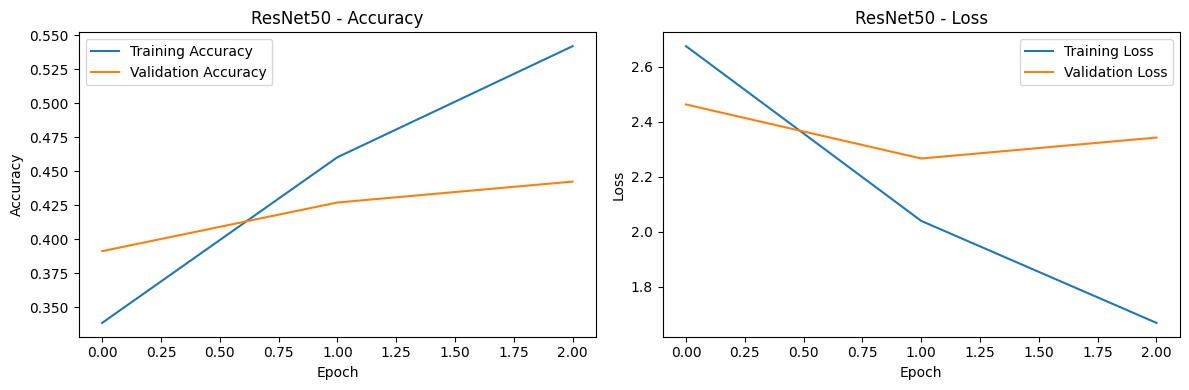

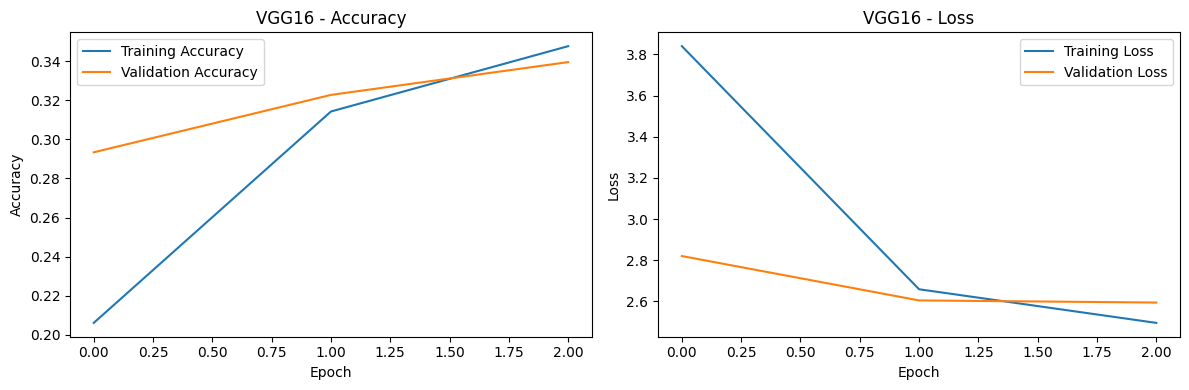

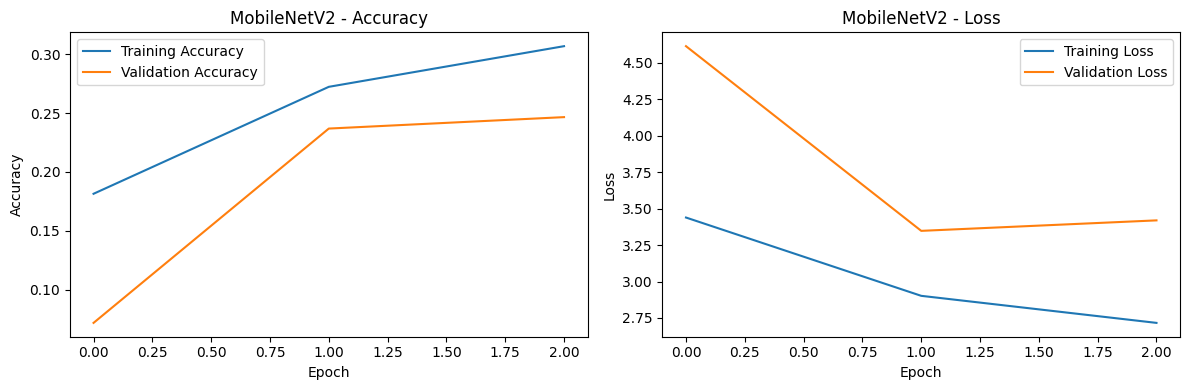

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the CIFAR-100 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16, and MobileNetV2 models (without top layers), added new classification layers for 100 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the ResNet50 model and training it for 10 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

In [8]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7OK148_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7OK148_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7OK148_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

### Assignment: Transfer Learning on Oxford Flowers 102

**Objective**: Apply transfer learning using pre-trained CNNs — ResNet50, VGG16, and MobileNetV2 — to classify images from the Oxford Flowers 102 dataset, and compare their performance.

**What you will do:**
- Load the Oxford Flowers 102 dataset using TensorFlow Datasets (TFDS).
- Prepare data pipelines (resize, normalize, batching, augmentation).
- Build three transfer learning pipelines:
  - ResNet50 (ImageNet pre-trained)
  - VGG16 (ImageNet pre-trained)
  - MobileNetV2 (ImageNet pre-trained)
- Train with frozen base → fine-tune selected top layers.
- Evaluate and compare accuracy, loss curves, and inference speed.

**About the dataset (Oxford Flowers 102):**
- 102 flower categories with varying difficulty and fine-grained differences.
- Images are diverse in pose, scale, and illumination.
- Dataset provided via TFDS with predefined train/validation/test splits.

**Why transfer learning here?**
- Flower categories are fine-grained; pre-trained ImageNet features help.
- Faster convergence and better generalization with limited data.


### 2. Data Loading and Exploration (Oxford Flowers 102)

In this section, you'll load the `oxford_flowers102` dataset using TensorFlow Datasets (TFDS), inspect available versions, create train/validation/test splits, and preview a few labeled samples.


In [9]:
!pip install tensorflow_datasets

  Preparing metadata (setup.py) ... done
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached docstring_parser-0.17.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 12.3 MB/s  0:00:00m0:00:010:01
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 15.3 MB/s  0:00:02 eta 0:00:01
Using cached docstring_parser-0.17.0-py3-none-any.whl (36 kB)
Using cached googleapis_common_protos-1.70.0-py3-none-any.whl (294 kB)
Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
Using cached zipp-3.23.0-py3-none-any.whl (10 kB)
  DEPRECATION: Building 'promise' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version

In [10]:
# 2.1 Inspect TFDS and available versions for oxford_flowers102
import tensorflow_datasets as tfds

# List builder info and versions
builder = tfds.builder("oxford_flowers102")
print("TFDS name:", builder.name)
print("Default version:", builder.version)
print("Available versions:", list(builder.versions))

# Load dataset with info and supervised pairs (image, label)
dataset, info = tfds.load(
    "oxford_flowers102:2.1.1",
    with_info=True,
    as_supervised=True
)

print("\nDataset info summary:\n", info)


TFDS name: oxford_flowers102
Default version: 2.1.1
Available versions: [Version('2.1.1')]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/ganeshkanagavel/tensorflow_datasets/oxford_flowers102/incomplete.RZJ4AZ_2.1.1/oxford_flowers1…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/ganeshkanagavel/tensorflow_datasets/oxford_flowers102/incomplete.RZJ4AZ_2.1.1/oxford_flowers1…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/ganeshkanagavel/tensorflow_datasets/oxford_flowers102/incomplete.RZJ4AZ_2.1.1/oxford_flowers1…

Dataset oxford_flowers102 downloaded and prepared to /Users/ganeshkanagavel/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.

Dataset info summary:
 tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger t

In [11]:
# 2.2 Extract splits and basic metadata
train_ds      = dataset["train"]
val_ds        = dataset["validation"]
test_ds       = dataset["test"]

num_classes   = info.features["label"].num_classes
sample_shape  = info.features["image"].shape  # (None, None, 3) variable-size images

print("Splits available:", list(dataset.keys()))
print("Num train:", info.splits["train"].num_examples)
print("Num val:",   info.splits["validation"].num_examples)
print("Num test:",  info.splits["test"].num_examples)
print("Num classes:", num_classes)
print("Image shape (raw):", sample_shape)


Splits available: [Split('train'), Split('test'), Split('validation')]
Num train: 1020
Num val: 1020
Num test: 6149
Num classes: 102
Image shape (raw): (None, None, 3)


### 3. Data Preprocessing (Resize, Normalize, One-Hot, Batch, Prefetch)

We will:
- Resize images to 224×224 to match common ImageNet input (ResNet50, VGG16, MobileNetV2).
- Apply model-specific `preprocess_input` functions.
- One-hot encode labels for 102 classes.
- Batch and prefetch for efficient input pipelines.


In [13]:
# 3.1 Build preprocessing pipelines for ResNet50, VGG16, MobileNetV2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

IMG_SIZE = (224, 224)
NUM_CLASSES = info.features["label"].num_classes
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE

# One-hot encode labels
def one_hot(label):
    return tf.one_hot(label, NUM_CLASSES)

# Generic resize function
@tf.function
def resize_image(image):
    image = tf.image.resize(image, IMG_SIZE, method=tf.image.ResizeMethod.BILINEAR)
    return image

# Map functions per model
@tf.function
def map_resnet50(image, label):
    image = resize_image(image)
    image = preprocess_resnet50(image)
    label = one_hot(label)
    return image, label

@tf.function
def map_vgg16(image, label):
    image = resize_image(image)
    image = preprocess_vgg16(image)
    label = one_hot(label)
    return image, label

@tf.function
def map_mobilenetv2(image, label):
    image = resize_image(image)
    image = preprocess_mobilenetv2(image)
    label = one_hot(label)
    return image, label

# Build datasets: shuffle (train), map, batch, prefetch
SHUFFLE_BUFFER = 1024

def build_ds(ds, map_fn, training=False):
    if training:
        ds = ds.shuffle(SHUFFLE_BUFFER, reshuffle_each_iteration=True)
    ds = ds.map(map_fn, num_parallel_calls=AUTO)
    ds = ds.batch(BATCH_SIZE, drop_remainder=False)
    ds = ds.prefetch(AUTO)
    return ds

train_resnet50 = build_ds(train_ds, map_resnet50, training=True)
val_resnet50   = build_ds(val_ds,   map_resnet50)
test_resnet50  = build_ds(test_ds,  map_resnet50)

train_vgg16 = build_ds(train_ds, map_vgg16, training=True)
val_vgg16   = build_ds(val_ds,   map_vgg16)
test_vgg16  = build_ds(test_ds,  map_vgg16)

train_mobilenetv2 = build_ds(train_ds, map_mobilenetv2, training=True)
val_mobilenetv2   = build_ds(val_ds,   map_mobilenetv2)
test_mobilenetv2  = build_ds(test_ds,  map_mobilenetv2)

print("Pipelines ready: ResNet50, VGG16, MobileNetV2")


Pipelines ready: ResNet50, VGG16, MobileNetV2


### 4. Model Adaptation and Training

For each pre-trained model (ResNet50, VGG16, MobileNetV2):
1. Load pre-trained base (without top layer)
2. Add custom classification head for 102 classes
3. Freeze base layers initially
4. Compile with categorical_crossentropy
5. Train with callbacks (EarlyStopping, ModelCheckpoint)
6. Fine-tune by unfreezing top layers


In [14]:
# 4.1 Setup callbacks and training parameters
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Training parameters
EPOCHS = 20
INITIAL_LR = 0.001
FINE_TUNE_LR = 0.0001

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

print("Callbacks and training parameters configured")


Callbacks and training parameters configured


In [15]:
# 4.2 ResNet50 Model Setup and Training
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 (without top layer)
base_resnet50 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add custom classification head
x = GlobalAveragePooling2D()(base_resnet50.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_resnet50 = Model(inputs=base_resnet50.input, outputs=predictions)

# Freeze base model layers
for layer in base_resnet50.layers:
    layer.trainable = False

# Compile model
model_resnet50.compile(
    optimizer=Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("ResNet50 model created and compiled")
model_resnet50.summary()


ResNet50 model created and compiled


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,689,126 (94.18 MB)

 Trainable params: 1,101,414 (4.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# 4.3 Train ResNet50 (Frozen Base)
model_checkpoint_resnet50 = ModelCheckpoint(
    'best_resnet50_flowers.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print("Training ResNet50 with frozen base...")
history_resnet50 = model_resnet50.fit(
    train_resnet50,
    validation_data=val_resnet50,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint_resnet50, reduce_lr],
    verbose=1
)

print("ResNet50 training completed!")


Training ResNet50 with frozen base...
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.0384 - loss: 4.9723
Epoch 1: val_accuracy improved from None to 0.38725, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.0765 - loss: 4.4775 - val_accuracy: 0.3873 - val_loss: 3.2198 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3500 - loss: 2.8749
Epoch 2: val_accuracy improved from 0.38725 to 0.63922, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.3912 - loss: 2.5858 - val_accuracy: 0.6392 - val_loss: 1.8302 - learning_rate: 0.0010
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6336 - loss: 1.5616
Epoch 3: val_accuracy improved from 0.63922 to 0.74706, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6461 - loss: 1.4520 - val_accuracy: 0.7471 - val_loss: 1.2105 - learning_rate: 0.0010
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7696 - loss: 0.8891
Epoch 4: val_accuracy improved from 0.74706 to 0.79412, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7647 - loss: 0.8935 - val_accuracy: 0.7941 - val_loss: 0.9413 - learning_rate: 0.0010
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8642 - loss: 0.5482
Epoch 5: val_accuracy improved from 0.79412 to 0.80980, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8608 - loss: 0.5567 - val_accuracy: 0.8098 - val_loss: 0.7956 - learning_rate: 0.0010
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8829 - loss: 0.4758
Epoch 6: val_accuracy improved from 0.80980 to 0.82843, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.8951 - loss: 0.4499 - val_accuracy: 0.8284 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9352 - loss: 0.3093
Epoch 7: val_accuracy improved from 0.82843 to 0.83137, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9284 - loss: 0.3218 - val_accuracy: 0.8314 - val_loss: 0.7115 - learning_rate: 0.0010
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9477 - loss: 0.2327
Epoch 8: val_accuracy did not improve from 0.83137
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9480 - loss: 0.2342 - val_accuracy: 0.8275 - val_loss: 0.6698 - learning_rate: 0.0010
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9630 - loss: 0.1974
Epoch 9: val_accuracy improved from 0.83137 to 0.85196, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9647 - loss: 0.1865 - val_accuracy: 0.8520 - val_loss: 0.5896 - learning_rate: 0.0010
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9720 - loss: 0.1432
Epoch 10: val_accuracy did not improve from 0.85196
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9706 - loss: 0.1496 - val_accuracy: 0.8471 - val_loss: 0.5999 - learning_rate: 0.0010
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9762 - loss: 0.1187
Epoch 11: val_accuracy did not improve from 0.85196
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9716 - loss: 0.1286 - val_accuracy: 0.8520 - val_loss: 0.5911 - learning_rate: 0.0010
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9839 - loss: 0.1161
Epoch 12: val_accuracy did not improve from 0.85196

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9765 - loss: 0.1249 - val_accuracy: 0.8451

32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9902 - loss: 0.0825 - val_accuracy: 0.8578 - val_loss: 0.5529 - learning_rate: 2.0000e-04
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9882 - loss: 0.0834
Epoch 14: val_accuracy did not improve from 0.85784
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9882 - loss: 0.0809 - val_accuracy: 0.8569 - val_loss: 0.5388 - learning_rate: 2.0000e-04
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9930 - loss: 0.0559
Epoch 15: val_accuracy improved from 0.85784 to 0.86176, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9902 - loss: 0.0664 - val_accuracy: 0.8618 - val_loss: 0.5352 - learning_rate: 2.0000e-04
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9894 - loss: 0.0761
Epoch 16: val_accuracy did not improve from 0.86176
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9922 - loss: 0.0696 - val_accuracy: 0.8559 - val_loss: 0.5331 - learning_rate: 2.0000e-04
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9935 - loss: 0.0489
Epoch 17: val_accuracy improved from 0.86176 to 0.86961, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9951 - loss: 0.0466 - val_accuracy: 0.8696 - val_loss: 0.5185 - learning_rate: 2.0000e-04
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9879 - loss: 0.0607
Epoch 18: val_accuracy did not improve from 0.86961
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9951 - loss: 0.0506 - val_accuracy: 0.8696 - val_loss: 0.5179 - learning_rate: 2.0000e-04
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9941 - loss: 0.0498
Epoch 19: val_accuracy improved from 0.86961 to 0.87451, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9941 - loss: 0.0524 - val_accuracy: 0.8745 - val_loss: 0.5096 - learning_rate: 2.0000e-04
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9952 - loss: 0.0437
Epoch 20: val_accuracy did not improve from 0.87451
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9951 - loss: 0.0438 - val_accuracy: 0.8735 - val_loss: 0.5088 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 19.
ResNet50 training completed!


In [17]:
# 4.4 Fine-tune ResNet50 (Unfreeze Top Layers)
# Unfreeze the last 30 layers for fine-tuning
for layer in base_resnet50.layers[-30:]:
    layer.trainable = True

# Recompile with lower learning rate
model_resnet50.compile(
    optimizer=Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Fine-tuning ResNet50 (unfreezing top 30 layers)...")
history_resnet50_finetune = model_resnet50.fit(
    train_resnet50,
    validation_data=val_resnet50,
    epochs=10,  # Fewer epochs for fine-tuning
    callbacks=[early_stopping, model_checkpoint_resnet50, reduce_lr],
    verbose=1
)

print("ResNet50 fine-tuning completed!")


Fine-tuning ResNet50 (unfreezing top 30 layers)...
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8680 - loss: 0.5225
Epoch 1: val_accuracy did not improve from 0.87451
32/32 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9196 - loss: 0.3386 - val_accuracy: 0.7412 - val_loss: 0.9184 - learning_rate: 1.0000e-04
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9888 - loss: 0.0725
Epoch 2: val_accuracy did not improve from 0.87451
32/32 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.9902 - loss: 0.0728 - val_accuracy: 0.8314 - val_loss: 0.6450 - learning_rate: 1.0000e-04
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9958 - loss: 0.0335
Epoch 3: val_accuracy did not improve from 0.87451

Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9941 - loss: 0.0370 - val_accuracy: 0.8598 - val_loss: 0.5130 - learning_rate: 1.0000e-04
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9971 - loss: 0.0244 - val_accuracy: 0.8755 - val_loss: 0.4571 - learning_rate: 2.0000e-05
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9965 - loss: 0.0216
Epoch 6: val_accuracy did not improve from 0.87549
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9971 - loss: 0.0218 - val_accuracy: 0.8755 - val_loss: 0.4501 - learning_rate: 2.0000e-05
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9996 - loss: 0.0153
Epoch 7: val_accuracy improved from 0.87549 to 0.87745, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9990 - loss: 0.0156 - val_accuracy: 0.8775 - val_loss: 0.4474 - learning_rate: 2.0000e-05
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9978 - loss: 0.0163
Epoch 8: val_accuracy improved from 0.87745 to 0.88333, saving model to best_resnet50_flowers.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9990 - loss: 0.0158 - val_accuracy: 0.8833 - val_loss: 0.4457 - learning_rate: 2.0000e-05
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9988 - loss: 0.0211
Epoch 9: val_accuracy did not improve from 0.88333
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.9990 - loss: 0.0183 - val_accuracy: 0.8833 - val_loss: 0.4459 - learning_rate: 2.0000e-05
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9998 - loss: 0.0139
Epoch 10: val_accuracy did not improve from 0.88333
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9990 - loss: 0.0134 - val_accuracy: 0.8833 - val_loss: 0.4473 - learning_rate: 2.0000e-05
Restoring model weights from the end of the best epoch: 8.
ResNet50 fine-tuning completed!


In [1]:
# 4.5 VGG16 Model Setup and Training
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 (without top layer)
base_vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add custom classification head
x = GlobalAveragePooling2D()(base_vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_vgg16 = Model(inputs=base_vgg16.input, outputs=predictions)

# Freeze base model layers
for layer in base_vgg16.layers:
    layer.trainable = False

# Compile model
model_vgg16.compile(
    optimizer=Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("VGG16 model created and compiled")
model_vgg16.summary()


: 

In [ ]:
# 4.6 Train and Fine-tune VGG16
model_checkpoint_vgg16 = ModelCheckpoint(
    'best_vgg16_flowers.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print("Training VGG16 with frozen base...")
history_vgg16 = model_vgg16.fit(
    train_vgg16,
    validation_data=val_vgg16,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint_vgg16, reduce_lr],
    verbose=1
)

# Fine-tune VGG16 (unfreeze last 4 layers)
for layer in base_vgg16.layers[-4:]:
    layer.trainable = True

model_vgg16.compile(
    optimizer=Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Fine-tuning VGG16...")
history_vgg16_finetune = model_vgg16.fit(
    train_vgg16,
    validation_data=val_vgg16,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint_vgg16, reduce_lr],
    verbose=1
)

print("VGG16 training and fine-tuning completed!")


In [ ]:
# 4.7 MobileNetV2 Model Setup and Training
from tensorflow.keras.applications import MobileNetV2

# Load pre-trained MobileNetV2 (without top layer)
base_mobilenetv2 = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add custom classification head
x = GlobalAveragePooling2D()(base_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_mobilenetv2 = Model(inputs=base_mobilenetv2.input, outputs=predictions)

# Freeze base model layers
for layer in base_mobilenetv2.layers:
    layer.trainable = False

# Compile model
model_mobilenetv2.compile(
    optimizer=Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("MobileNetV2 model created and compiled")
model_mobilenetv2.summary()


In [ ]:
# 4.8 Train and Fine-tune MobileNetV2
model_checkpoint_mobilenetv2 = ModelCheckpoint(
    'best_mobilenetv2_flowers.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print("Training MobileNetV2 with frozen base...")
history_mobilenetv2 = model_mobilenetv2.fit(
    train_mobilenetv2,
    validation_data=val_mobilenetv2,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint_mobilenetv2, reduce_lr],
    verbose=1
)

# Fine-tune MobileNetV2 (unfreeze last 20 layers)
for layer in base_mobilenetv2.layers[-20:]:
    layer.trainable = True

model_mobilenetv2.compile(
    optimizer=Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Fine-tuning MobileNetV2...")
history_mobilenetv2_finetune = model_mobilenetv2.fit(
    train_mobilenetv2,
    validation_data=val_mobilenetv2,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint_mobilenetv2, reduce_lr],
    verbose=1
)

print("MobileNetV2 training and fine-tuning completed!")


2025-09-17 14:36:46.080785: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-09-17 14:36:46.104697: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


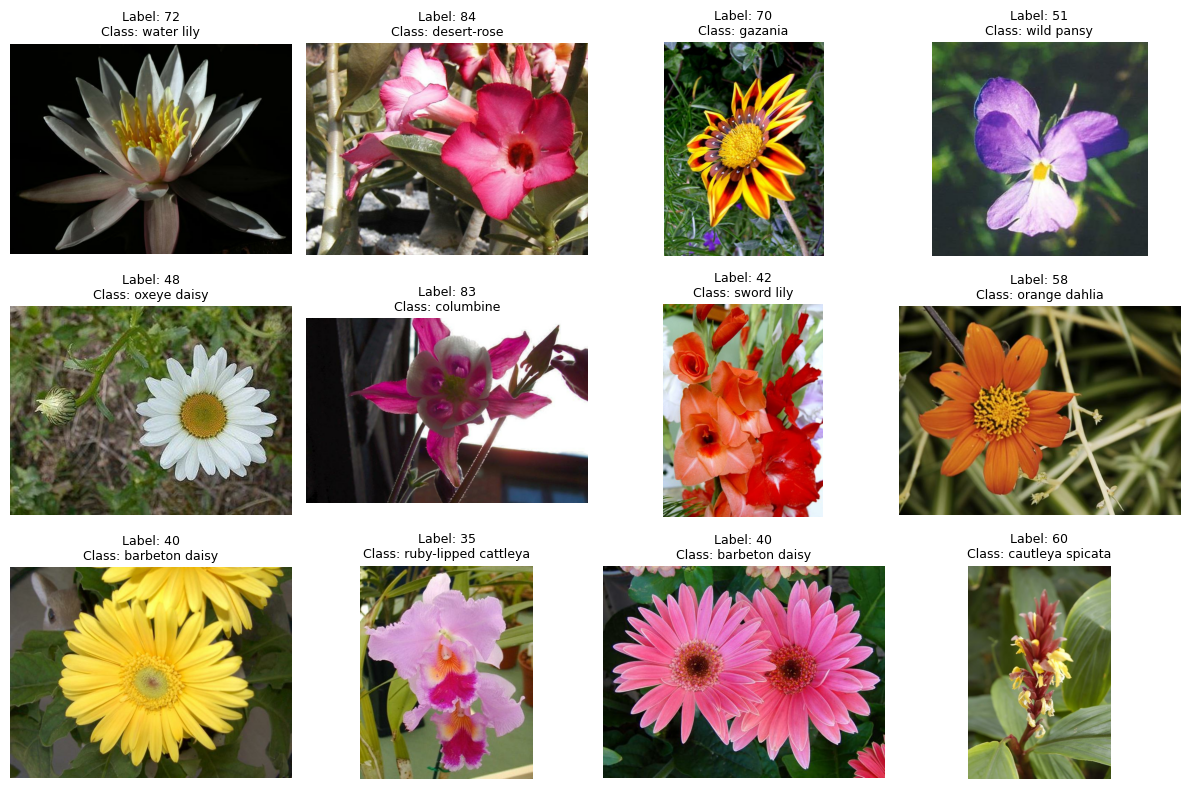

In [ ]:
# 2.3 Visualize a few samples with labels
import matplotlib.pyplot as plt

# Get label names if available (ClassLabel)
label_names = info.features["label"].names

# Take a small batch from the training set
examples = list(tfds.as_numpy(train_ds.take(12)))  # [(image, label), ...]

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(examples):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    title = f"Label: {label}"
    if label_names:
        title += f"\nClass: {label_names[label]}"
    plt.title(title, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### 3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.